In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data and removing unnecessary column from the dataframe

In [84]:

df = pd.read_csv('credit_score.csv')
df = df.drop(columns=['ID','Customer_ID','Name','SSN','Type_of_Loan', 'Credit_History_Age',])
df.head()


C:\Users\arvin\AppData\Local\Temp\ipykernel_14956\570042669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('credit_score.csv')


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Checking the shape of a dataframe and datatypes of all columns
along with calculating the statistical data.

In [85]:


df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Missing Values

Checking out the missing values in a dataframe

In [86]:

df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Data Cleaning

Replacing the special characters with empty string or with null values according to
the data and converting it into int or float datatype. Also,Converting the
categorical values of some columns into integer values.

In [87]:
df['Age']=df['Age'].str.replace('_','')
df['Age']=df['Age'].astype(int)
df['Occupation']=df['Occupation'].replace('_______',np.nan)
df['Annual_Income']=df['Annual_Income'].str.replace('_','')
df['Annual_Income']=df['Annual_Income'].astype(float)
df['Num_of_Loan']=df['Num_of_Loan'].str.replace('_','')
df['Num_of_Loan']=df['Num_of_Loan'].astype(int)
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace('_','')
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(float)
df['Credit_Score']=df['Credit_Score'].replace(['Poor','Standard','Good'],[0,1,2])
df['Monthly_Balance']=df['Monthly_Balance'].str.replace('_','')
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)
df['Payment_Behaviour']=df['Payment_Behaviour'].replace('!@9#%8',np.nan)
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace('_','')
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace('NM','No')
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace(['Yes','No'],[1,0])
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace('_','')
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float)
df['Credit_Mix']=df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix']=df['Credit_Mix'].replace(['Standard','Good','Bad'],[1,2,0])
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [89]:

df.isnull().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [90]:
df=df.fillna(method='ffill')
df=df.fillna(method='bfill')
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Removing outliers from age since all other columns values are relevant

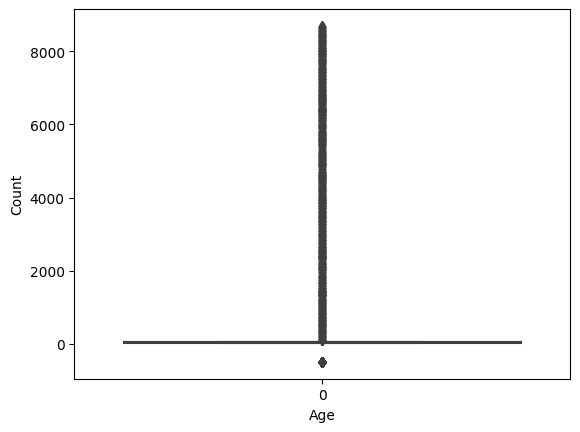

In [91]:
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

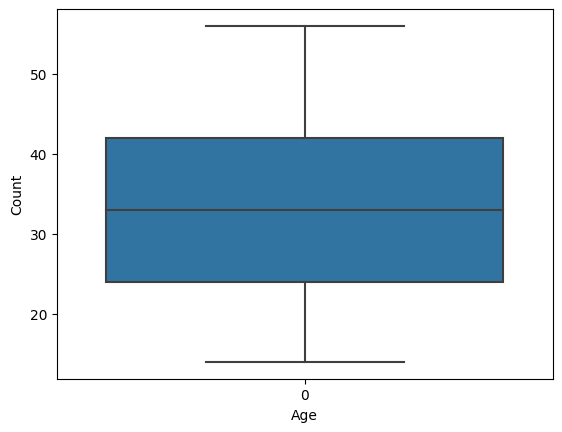

In [92]:
col_names=['Age']
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR = q3-q1
data = df[(df.Age>=q1-1.5*IQR)&(df.Age <=q3+1.5*IQR)]
sns.boxplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Performing One Hot Encoding for categorical features of a dataframe

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Month']=le.fit_transform(df['Month'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Payment_Behaviour']=le.fit_transform(df['Payment_Behaviour'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

Feature Selection

Selecting the features using VIF. VIF should be less than 5.

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object')&(col !='Credit_Score')):
        col_list.append(col)
        
x=df[col_list]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,1)
                 for i in range(len(x.columns))]

print(vif_data)

                    features       VIF
0                      Month  0.974661
1                        Age  0.974661
2                 Occupation  0.974661
3              Annual_Income  0.974661
4      Monthly_Inhand_Salary  0.974661
5          Num_Bank_Accounts  0.974661
6            Num_Credit_Card  0.974661
7              Interest_Rate  0.974661
8                Num_of_Loan  0.974661
9        Delay_from_due_date  0.974661
10    Num_of_Delayed_Payment  0.974661
11      Changed_Credit_Limit  0.974661
12      Num_Credit_Inquiries  0.974661
13                Credit_Mix  0.974661
14          Outstanding_Debt  0.974661
15  Credit_Utilization_Ratio  0.974661
16     Payment_of_Min_Amount  0.974661
17       Total_EMI_per_month  0.974661
18   Amount_invested_monthly  0.974661
19         Payment_Behaviour  0.974661
20           Monthly_Balance  0.974661


Logistic Regression

In [95]:
x=df.drop(columns=['Credit_Score'])
y=df['Credit_Score']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [97]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
print('accuracy_score:',a)
pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})

accuracy_score: 0.61855


,actual_value,predicted_value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
a=accuracy_score(y_test,y_pred)
print('accuracy_score:',a)
pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})

accuracy_score: 0.69725


,actual_value,predicted_value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
a=accuracy_score(y_test,y_pred)
print('accuracy_score:',a)
pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred})

accuracy_score: 0.8005


,Actual_value,Predicted_value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1
